# Customizing Colorbars

In [4]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

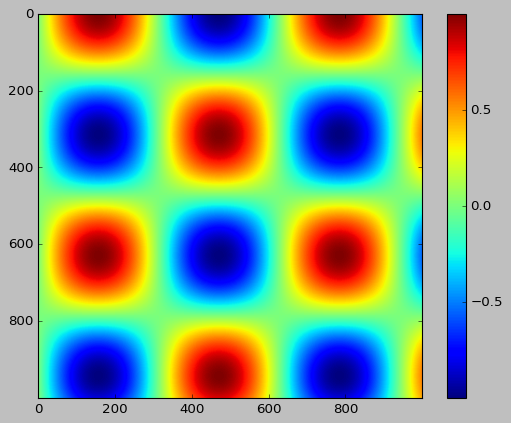

In [ ]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();     #가장 단순한 색상 막대

### 색상 막대 맞춤 변경하기

시각화 결과를 만들 플로팅 함수에 cmap인수를 사용해 색상 지도를 지정 가능

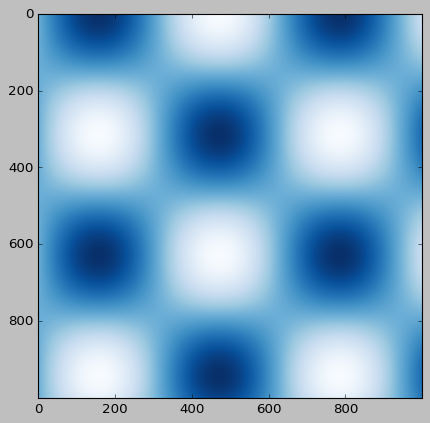

In [6]:
plt.imshow(I, cmap='Blues');

In [7]:
#cmap에 넣을 수 있는 색상 보기
print(dir(plt.cm))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'ColormapRegistry', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'Mapping', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'ScalarMappable', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', '_LUTSIZE', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_api', '_auto_norm_from_scale', '_colormaps', '_ensure_cmap', '_gen_cmap_r

#### 색상 지도 선택하기

- *Sequential colormaps(순차적 색상 지도)*: 하나의 연속적인 순서를 가지는 색상으로 구성돼 있음 (e.g., `binary` or `viridis`).
- *Divergent colormaps(발산적 색상 지도)*: 일반적으로 평균을 기준으로 양수 및 음수 편차를 나타내는 두 가지 구별된 색상을 포함 (e.g., `RdBu` or `PuOr`).
- *Qualitative colormaps(정성적 색상 지도)*: 특정 순서 없이 색을 혼합 (e.g., `rainbow` or `jet`).

In [8]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # Convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(
        cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

C:\Users\user\AppData\Local\Temp\ipykernel_17836\1598486860.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\user\AppData\Local\Temp\ipykernel_17836\1598486860.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)


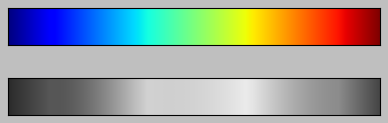

In [ ]:
view_colormap('jet')
#jet색상 지도와 균일하지 않은 휘도

In [ ]:
view_colormap('viridis')
# 순차적 색상 지도
# viridis 색상 지도와 균일한 휘도

C:\Users\user\AppData\Local\Temp\ipykernel_17836\1598486860.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\user\AppData\Local\Temp\ipykernel_17836\1598486860.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)


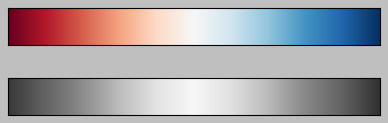

In [10]:
view_colormap('RdBu')
#발산적 색상 지도

#### 색상 한계 및 확장

p.298

In [ ]:
I

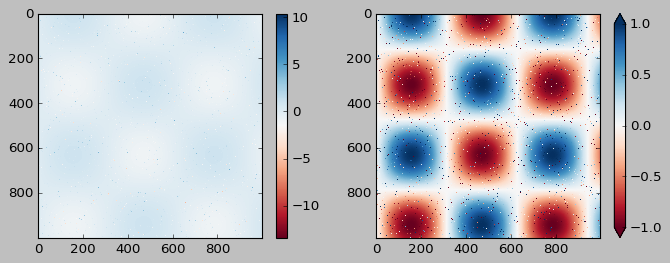

In [ ]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))
# 1% noise 만들기

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

#### 불연속적 색상 막대

색상 지도는 연속적인 게 기본이지만, 때로 불연속적인 값을 표현하고 싶다면 가장 쉬운 방법이 plt.cm.get_cmap()함수를 사용하고 적절한 색상 지도의 이름과 함께 원하는 구간(bin)의 개수를 전달하는 것이다.

C:\Users\user\AppData\Local\Temp\ipykernel_17836\3119515715.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))


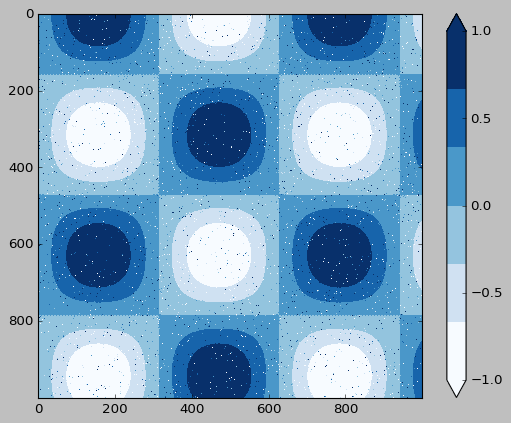

In [13]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar(extend='both')
plt.clim(-1, 1);

## 예제: 손으로 쓴 숫자

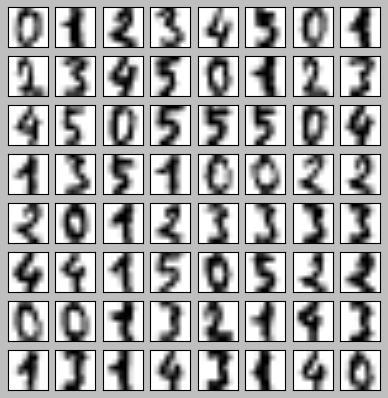

In [19]:
# 0~5까지 숫자의 이미지를 적재하고 그중 몇 가지를 시각화
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [21]:
type(digits)

sklearn.utils._bunch.Bunch


sklearn.utils._bunch.Bunch는 Scikit-learn에서 제공하는 편리한 데이터 구조로, Python 딕셔너리와 비슷한 기능을 제공하면서 속성(attribute) 접근 방식을 지원합니다.


**공통 key**
- ``data`` : 샘플 데이터, Numpy 배열
- ``target`` : Lable 데이터, numpy 배열
- ``feature_names`` : Feature 데이터의 이름
- ``target_names`` : Label 데이터의 이름


In [ ]:
digits.data[:5]     #손글씨 이미지를 숫자로 표현

In [27]:
# Isomapdmf 사용해 숫자를 2차원에 사영
from sklearn.manifold import Isomap
iso = Isomap(n_components=2, n_neighbors=15)
projection = iso.fit_transform(digits.data)

C:\Users\user\AppData\Local\Temp\ipykernel_17836\2534648952.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=digits.target, cmap=plt.cm.get_cmap('plasma', 6))


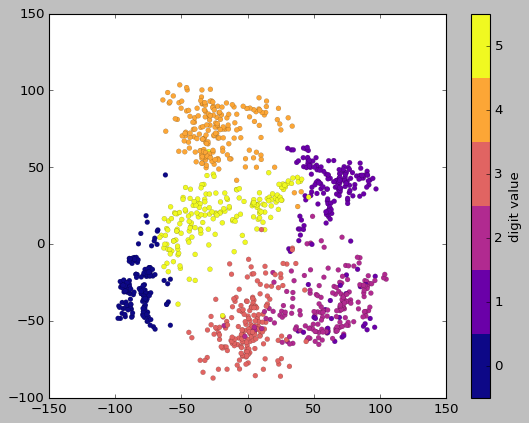

In [28]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('plasma', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)